<a href="https://colab.research.google.com/github/wooihaw/ai_with_python_2024/blob/main/handson_3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hands-on 3b
#### The sinking of the RMS Titanic is one of the most infamous tragedy in history. In this hands-on, a machine learning system will be developed to predict which passengers survived the tragedy.
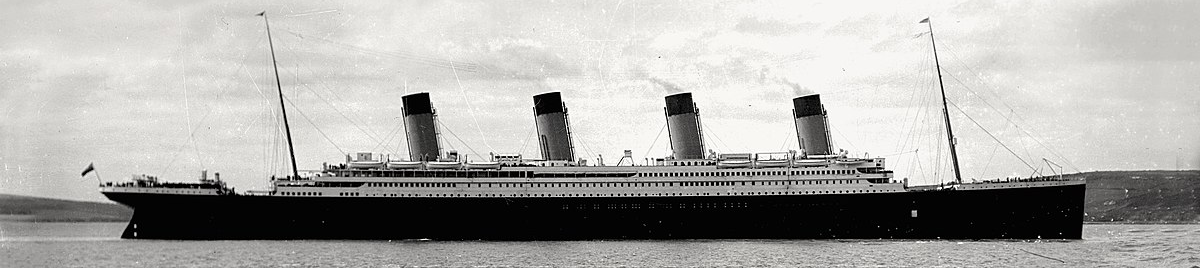

In [1]:
# Initialization
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load libraries
import pandas as pd

# Load dataset from csv file
df1 = pd.read_csv('https://raw.githubusercontent.com/wooihaw/ai_with_python_2024/main/titanic.csv')

In [3]:
# Preview 10 random samples of the dataset
df1.sample(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


In [4]:
# Statistical summary
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**To do:**
- Check the number of missing data for each column by using isna().sum()

In [5]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**To do:**
- Select only the columns 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived' and store them in df2
- Print first 5 rows of df2 using head()

In [6]:
columns = ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
df2 = df1[columns]
df2.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


**To do:**
- Replace the missing data (imputation) in 'Age' column in df2 with its median by using fillna()
- Check whether there is any more missing data by using isna().sum()

In [7]:
df2 = df2.fillna({"Age": df2["Age"].median()})
df2.isna().sum()

Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

**To do:**
- Use get_dummies() function from pandas to convert categorical features into one hot encoding and store the results in df3
- Print first 5 rows of df3 by using head()

In [8]:
df3 = pd.get_dummies(df2, columns=["Gender"])
df3.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender_female,Gender_male
0,3,22.0,1,0,7.2500,0,False,True
1,1,38.0,1,0,71.2833,1,True,False
2,3,26.0,0,0,7.9250,1,True,False
3,1,35.0,1,0,53.1000,1,True,False
4,3,35.0,0,0,8.0500,0,False,True


Save the pre-processed data for later use

In [9]:
df3.to_csv('titanic_processed.csv', index=False)